In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
        
data = pd.read_csv('/kaggle/input/loan-default-dataset/Loan_Default.csv')

# Data Cleaning

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [3]:
# Unique values of each categorical feature:

for col in data.columns:
    if data[col].dtypes == object:
        print(col + ' ' + '-'*(30-len(col)) + ' ', data[col].unique())
    else:
        pass

loan_limit --------------------  ['cf' nan 'ncf']
Gender ------------------------  ['Sex Not Available' 'Male' 'Joint' 'Female']
approv_in_adv -----------------  ['nopre' 'pre' nan]
loan_type ---------------------  ['type1' 'type2' 'type3']
loan_purpose ------------------  ['p1' 'p4' 'p3' 'p2' nan]
Credit_Worthiness -------------  ['l1' 'l2']
open_credit -------------------  ['nopc' 'opc']
business_or_commercial --------  ['nob/c' 'b/c']
Neg_ammortization -------------  ['not_neg' 'neg_amm' nan]
interest_only -----------------  ['not_int' 'int_only']
lump_sum_payment --------------  ['not_lpsm' 'lpsm']
construction_type -------------  ['sb' 'mh']
occupancy_type ----------------  ['pr' 'sr' 'ir']
Secured_by --------------------  ['home' 'land']
total_units -------------------  ['1U' '2U' '3U' '4U']
credit_type -------------------  ['EXP' 'EQUI' 'CRIF' 'CIB']
co-applicant_credit_type ------  ['CIB' 'EXP']
age ---------------------------  ['25-34' '55-64' '35-44' '45-54' '65-74' '>74' '<2

**Understanding some abbreviations and their meaning:**
* Loan limit: CF (conforming) or NCF (non-conforming). Conforming loans meet the criteria for purchases by Fannie Mae or Freddie Mac to issue MBS, thus usually have lower interest or downpayment. ([source](https://www.quickenloans.com/learn/what-is-a-conforming-loan))
* Approveal in advance (approv_in_adv): as the name suggests.
* Open credit: whether the borrower is allowed to borrow more money.
* Neg ammortization: A negative amortization loan is one in which unpaid interest is added to the balance of unpaid principal. ([source](https://www.investopedia.com/terms/n/negativeamortization.asp)) 
* Construction type: SB (splash block) or MH (manhole)
* Occupancy type: PR, SR, and IR refer to primary, secondary and investment. Financial risks increase with the latter ones, so do interest rates. ([soure](https://www.homelendingpal.com/how-mortgage-lenders-determine-interest-rates-based-on-occupancy-types/))
* Credit type: EXP = Experian, EQUI = Equifax, CRIF = CRIF Highmark, CIB = CIBIL. These are different credit reporting agencies. The main differences come down to the credit score calculations used and how they process information. ([source](https://www.chase.com/personal/credit-cards/education/credit-score/credit-bureau-differences) and [source](https://en.wikipedia.org/wiki/Credit_bureau))
* Submission of application: *to_inst* seems to refer to a special method for loan approval, i.e. instance-based method. Read more at ([source](https://www.sciencedirect.com/science/article/pii/S0957417421002396)).
* Security type: Direct or Indirect. Direct security means the borrower uses the mortgaged house to pledge against the loan. ([source](https://corporatefinanceinstitute.com/resources/commercial-lending/direct-security/#:~:text=To%20conclude%2C%20direct%20securities%20are,the%20borrower%20default%20on%20it.))


In [4]:
# Remove features that do not have significant impact on default

loan = data.copy()
loan.drop(columns=['ID' ,'loan_limit' ,'Gender', 'construction_type', 'Secured_by', 'total_units', \
                   'credit_type', 'co-applicant_credit_type', 'Region', 'Neg_ammortization', 'year', \
                   'submission_of_application' , 'approv_in_adv'], 
          axis=1, inplace=True)

loan.describe()

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [5]:
loan['Status'].sum()  #Number of defaulted loans

36639

Over 36,000 loans or almost 25% of the dataset are defaults (mean value of Status). The dataset is imbalance but not significantly. Noticably there are some loans where income = 0 and most of them defaulted as shown below.

In [6]:
# No. of loans with income=0, by Status

zero_income = loan[loan['income']==0]
zero_income.groupby(['Status'])['Status'].count()

Status
0       8
1    1252
Name: Status, dtype: int64

In [7]:
# Checking for duplicates

print('Number of duplicated records: ', len(loan[loan.duplicated() == True]))

Number of duplicated records:  1


In [8]:
# Remove duplicates and double check

loan = loan.drop_duplicates()
print('Number of duplicated records: ', len(loan[loan.duplicated() == True]))

Number of duplicated records:  0


In [9]:
# Checking for missing data

print('Pecentage of missing data:    %')
print('-------------------------------')
round(loan.isna().sum()/loan.shape[0] * 100,2).sort_values()

Pecentage of missing data:    %
-------------------------------


loan_type                  0.00
Security_Type              0.00
Credit_Score               0.00
occupancy_type             0.00
lump_sum_payment           0.00
Status                     0.00
interest_only              0.00
loan_amount                0.00
business_or_commercial     0.00
open_credit                0.00
Credit_Worthiness          0.00
term                       0.03
loan_purpose               0.09
age                        0.13
income                     6.15
property_value            10.15
LTV                       10.15
dtir1                     16.22
rate_of_interest          24.51
Interest_rate_spread      24.64
Upfront_charges           26.66
dtype: float64

Before we modify the dataset, we want to know whether we will be modifying any default records. As shown below, the rows with misisng values consist of non-default loans only. So any modifications we are going to make to the dataset will not affect them. 

In [10]:
# Missing values by Status

loan.isna().groupby('Status').sum().T

Status,False
loan_type,0
loan_purpose,134
Credit_Worthiness,0
open_credit,0
business_or_commercial,0
loan_amount,0
rate_of_interest,36438
Interest_rate_spread,36638
Upfront_charges,39641
term,41


Handling missing values in each feature should be dealt with separately and in a specific order. 

* Term, loan_purpose, age: fill with the most popular value since missing values are insignificant.
* income, property_value, rate_of_interest, Interest_rate_spread, Upfront_charges: fill with mean value. (AFD)
* LTV, dtir1: fill with the result of calculations from loan amount, property value, and income. Since there are records with income=0, we will replace 0 with the mean value of income before performing divisions. (AFD)

For future development, read more about different methods [here](https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/#:~:text=Impute%20with%20Averages%20or%20Midpoints,method%20can%20preserve%20data%20integrity.) and [here](https://medium.com/@pingsubhak/handling-missing-values-in-dataset-7-methods-that-you-need-to-know-5067d4e32b62#).

(AFD: Area for development)

In [11]:
# Fill with most popular value
g1 = ['term', 'loan_purpose', 'age', ]
for col in g1:
    loan[col] = loan[col].fillna(loan[col].value_counts().keys()[0])

# Fill with mean
g2 = ['income', 'property_value', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges']
for col in g2:
    loan[col] = loan[col].fillna(loan[col].mean())
    
# Replace 0 with mean
loan['income'] = loan['income'].replace(0, loan['income'].mean())
    
# Fill with calculated values
loan['LTV'] = loan['LTV'].fillna(loan['loan_amount'] / loan['property_value'])
loan['dtir1'] = loan['dtir1'].fillna(loan['loan_amount'] / loan['income']) 

In [12]:
# Change the data type of Status to categorical

loan = loan.astype({'Status': 'object'})

# Univariate Analysis

In [13]:
# Grouping features for visualization
input_1 = ['loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'term', 'interest_only', 'lump_sum_payment', 'occupancy_type', 'Credit_Score', 'age', 'Security_Type']
input_2 = ['loan_amount', 'Upfront_charges', 'property_value', 'income', ]
input_3 = ['rate_of_interest', 'Interest_rate_spread', 'LTV', 'dtir1']

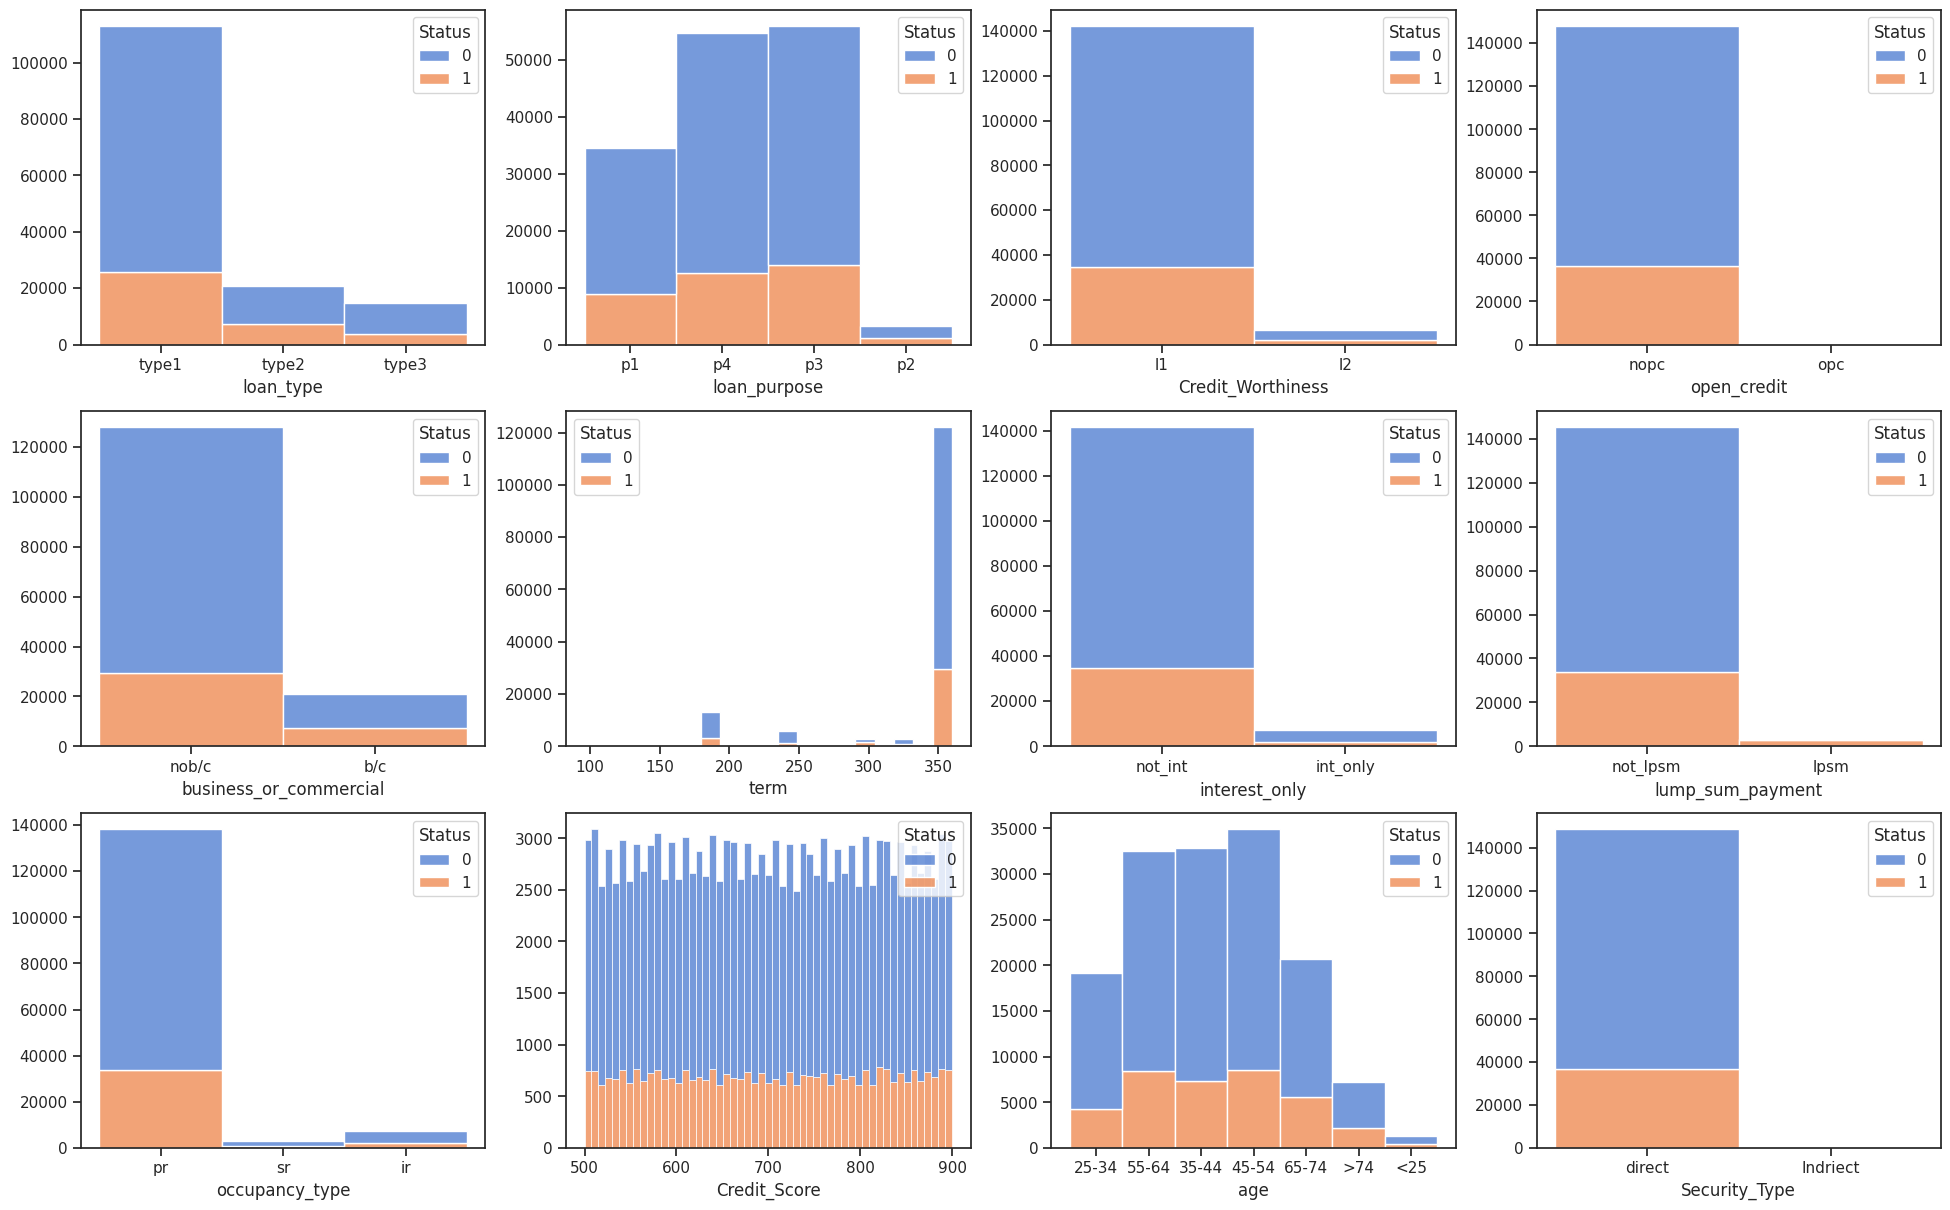

In [14]:
# Distribution of group 1

import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")

sns.set_theme(style="ticks", palette="muted")
f1 = plt.figure(figsize=(24,20))
for col in input_1:
    i = input_1.index(col) + 1
    ax = f1.add_subplot(4,4,i)
    g1 = sns.histplot(loan, x=loan[col], legend=True, hue='Status', multiple='stack')
    g1.set(ylabel=None)

*Credit_Score* does not seem to have a remarkable impact to default. Across all levels, the ratio of defaults/non-defaults is fairly stable. We can remove this feature from the dataset.

*open_credit* and *Security_Type* are not very helpful because there are no (or almost no) records with open credit or indirect security, respectively. We can verify it by looking at the total of records with each feature.

In [15]:
print(loan.groupby(by=['Status','Security_Type'])['Status'].count())
print(loan.groupby(by=['Status','open_credit'])['Status'].count())

Status  Security_Type
0       direct           112031
1       Indriect             33
        direct            36605
Name: Status, dtype: int64
Status  open_credit
0       nopc           111573
        opc               458
1       nopc            36540
        opc                98
Name: Status, dtype: int64


In [16]:
# Remove Credit_Score, open_credit and Security_Type

loan = loan.drop(['open_credit', 'Security_Type', 'Credit_Score'], axis=1)

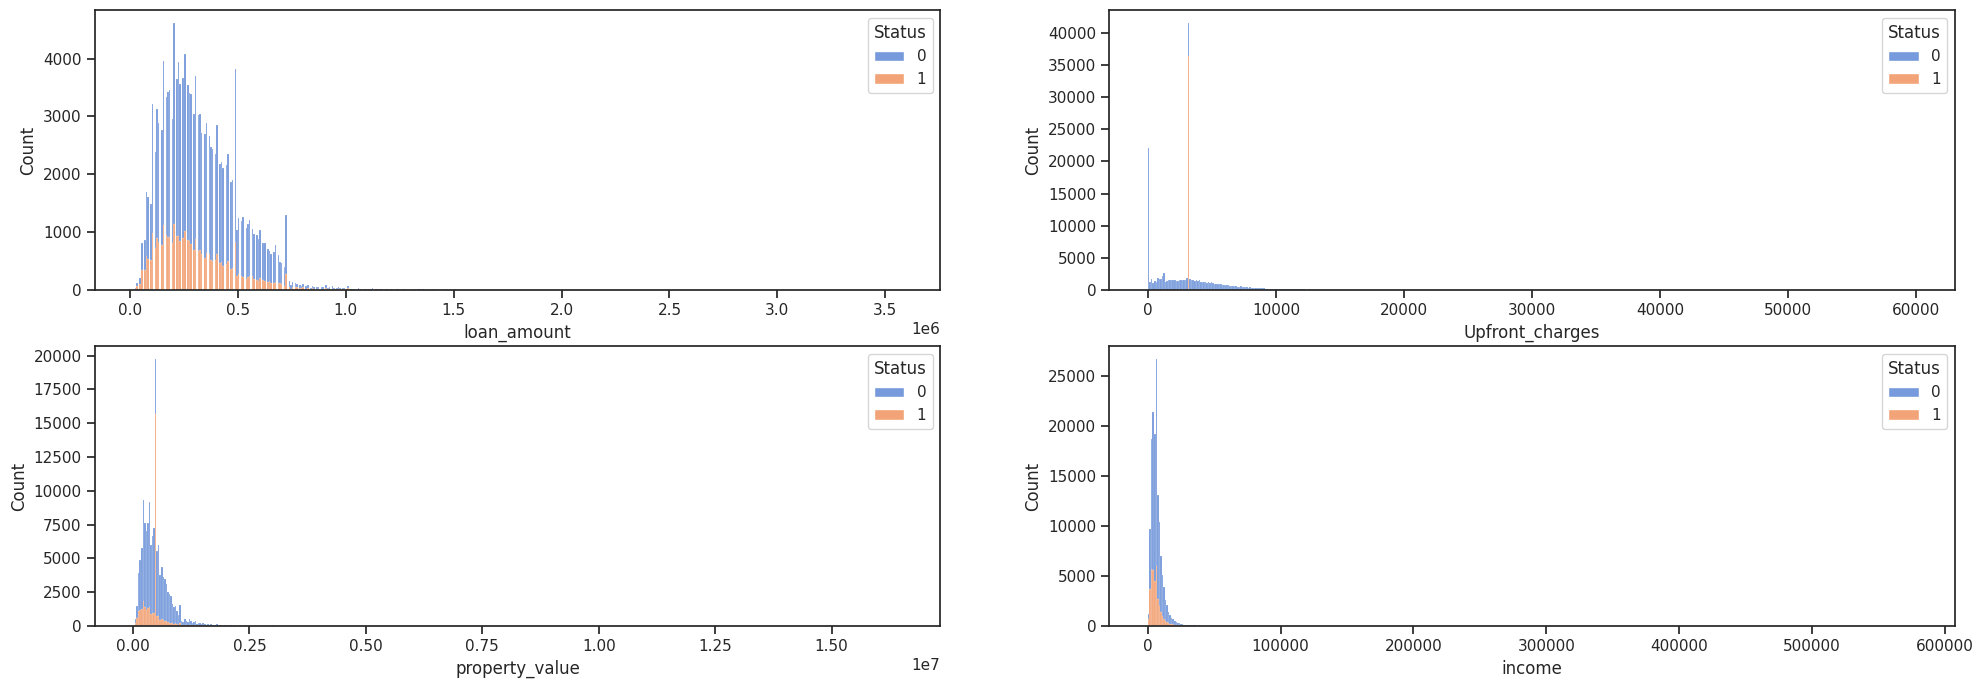

In [17]:
# Distribution of group 2 

f2 = plt.figure(figsize=(24,8))
for col in input_2:
    i = input_2.index(col) + 1
    ax = f2.add_subplot(2,2,i)
    g2 = sns.histplot(loan, x=loan[col], legend=True, hue='Status', multiple='stack', bins=500)

## Property Value

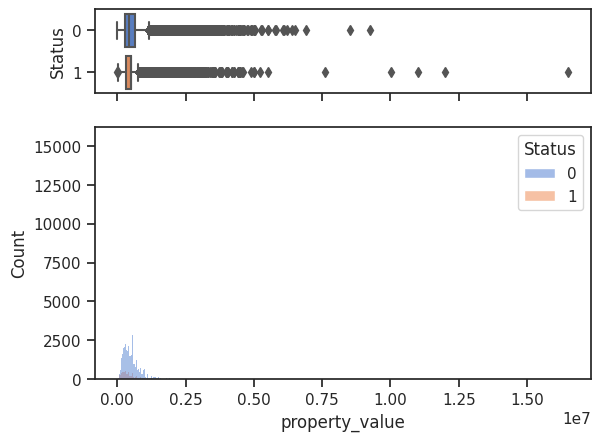

In [18]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.25, .75)})
 
# assigning a graph to each ax
sns.boxplot(loan, x='property_value', y='Status', orient='h', ax=ax_box)
sns.histplot(loan, x='property_value', hue='Status', ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

In [19]:
c = 15000
pv = loan['property_value']
d = (pv.value_counts()>c).sum()
print(d, ' record(s) with more than ', str(c), ' counts.')
pv2 = pv.value_counts().sort_values(ascending=False)
pv2.iloc[:5]

1  record(s) with more than  15000  counts.


property_value
497893.465696    15097
308000.000000     2792
258000.000000     2763
358000.000000     2679
408000.000000     2537
Name: count, dtype: int64

Over 15,000 records have the property value of exactly \$497,893.46 is extremely odd.

In [20]:
loan[pv==pv2.index[0]]

,loan_type,loan_purpose,Credit_Worthiness,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,interest_only,lump_sum_payment,property_value,occupancy_type,income,age,LTV,Status,dtir1
1,type2,p1,l1,b/c,206500,4.045476,0.441656,3224.996127,360.0,not_int,lpsm,497893.465696,pr,4980.000000,55-64,0.414747,1,41.465863
26,type3,p1,l1,nob/c,476500,4.045476,0.441656,3224.996127,360.0,not_int,not_lpsm,497893.465696,pr,6780.000000,45-54,0.957032,1,70.280236
42,type3,p4,l1,nob/c,466500,4.045476,0.441656,3224.996127,360.0,not_int,not_lpsm,497893.465696,pr,6957.388743,45-54,0.936947,1,67.051018
52,type3,p3,l1,nob/c,136500,4.045476,0.441656,3224.996127,360.0,not_int,not_lpsm,497893.465696,pr,3360.000000,65-74,0.274155,1,40.625000
53,type1,p3,l1,nob/c,166500,4.045476,0.441656,3224.996127,360.0,not_int,not_lpsm,497893.465696,pr,4560.000000,65-74,0.334409,1,36.513158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148644,type1,p3,l1,nob/c,276500,4.045476,0.441656,3224.996127,180.0,not_int,not_lpsm,497893.465696,pr,4140.000000,>74,0.555340,1,66.787440
148649,type1,p3,l1,nob/c,256500,4.045476,0.441656,3224.996127,240.0,not_int,not_lpsm,497893.465696,pr,8220.000000,55-64,0.515170,1,31.204380
148652,type1,p1,l1,nob/c,96500,4.045476,0.441656,3224.996127,180.0,not_int,not_lpsm,497893.465696,ir,5460.000000,55-64,0.193817,1,17.673993
148658,type1,p4,l1,nob/c,386500,4.045476,0.441656,3224.996127,360.0,int_only,not_lpsm,497893.465696,pr,4680.000000,25-34,0.776270,1,82.585470


They not only have the same odd property value, but also interest rate, interest rate spread, and upfront charges.

In [21]:
loan[pv==pv2.index[0]].groupby(['Status']).count().T

Status,0,1
loan_type,2,15095
loan_purpose,2,15095
Credit_Worthiness,2,15095
business_or_commercial,2,15095
loan_amount,2,15095
rate_of_interest,2,15095
Interest_rate_spread,2,15095
Upfront_charges,2,15095
term,2,15095
interest_only,2,15095


We can see that these are all defaulted loans. Indeed, it counts for roughly 50% of the defaults. Due to the incorrect property value, they all have very low LTV ratios.

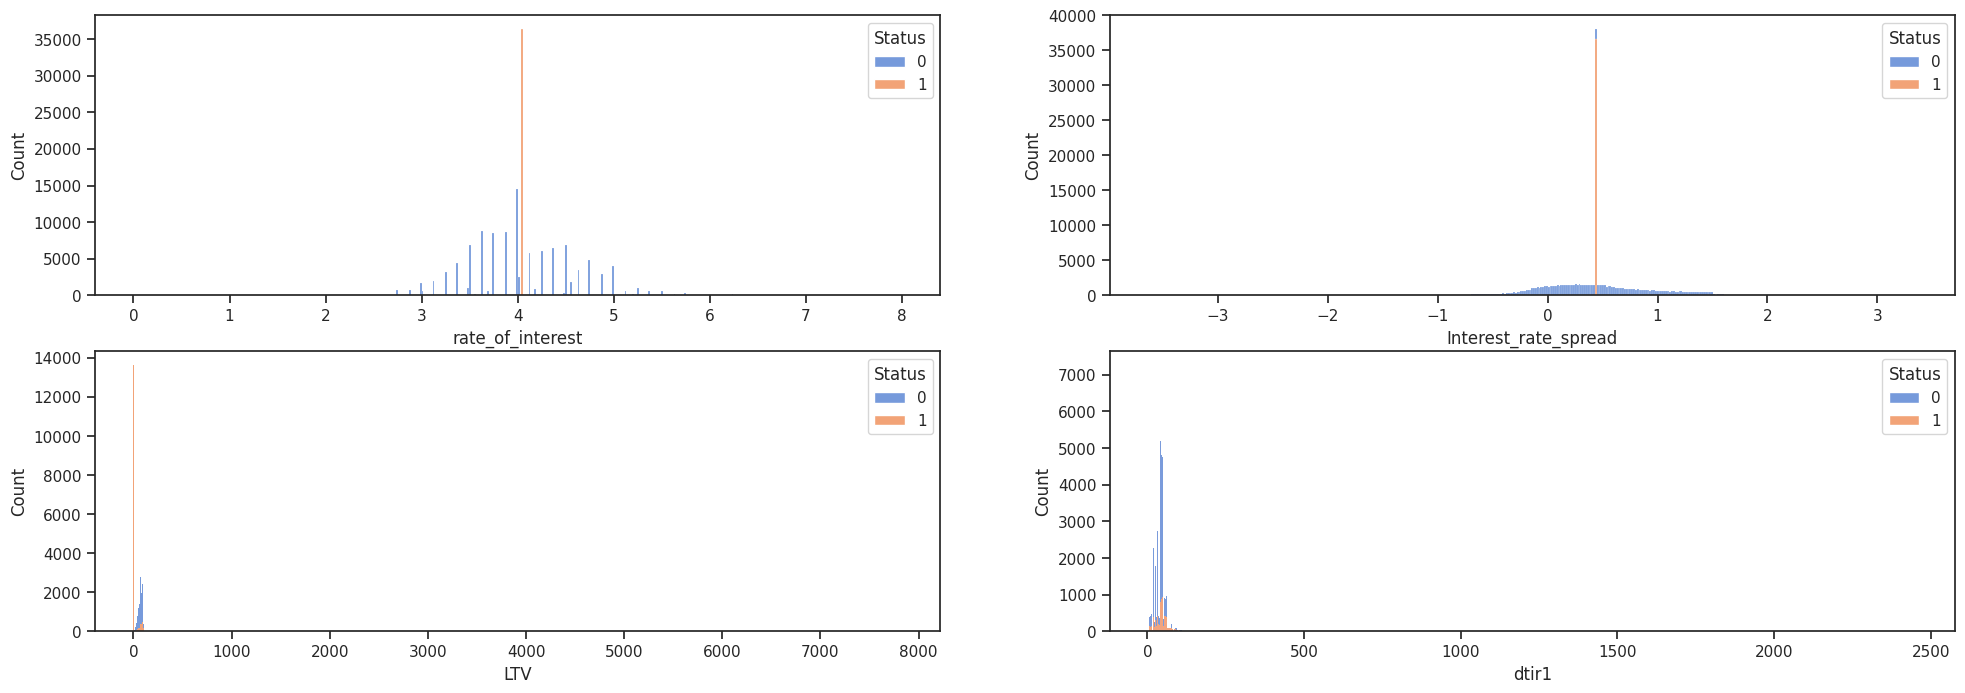

In [22]:
# Distribution of group 3

f3 = plt.figure(figsize=(24,8))
for col in input_3:
    i = input_3.index(col) + 1
    ax = f3.add_subplot(2,2,i)
    g2 = sns.histplot(loan, x=loan[col], legend=True, hue='Status', multiple='stack', )

We need to keep in mind that *property_value*, *rate_of_interest*, *Interest_rate_spread* and *Upfront_charges* have a lot of missing data (10%-27%) and have been filled with the mean value. *LTV* and *dtir1* also have a lot of missing data and were calculated with the filled data of other features. However, as noted earlier, we did not modify any data related to defaulted loans. The outliers shown in the above charts for each feature come from the original dataset.

Following the analysis of property value, it is not a surprise to see a spike in interest rate, interest rate spread and LTV for defaults.

## LTV

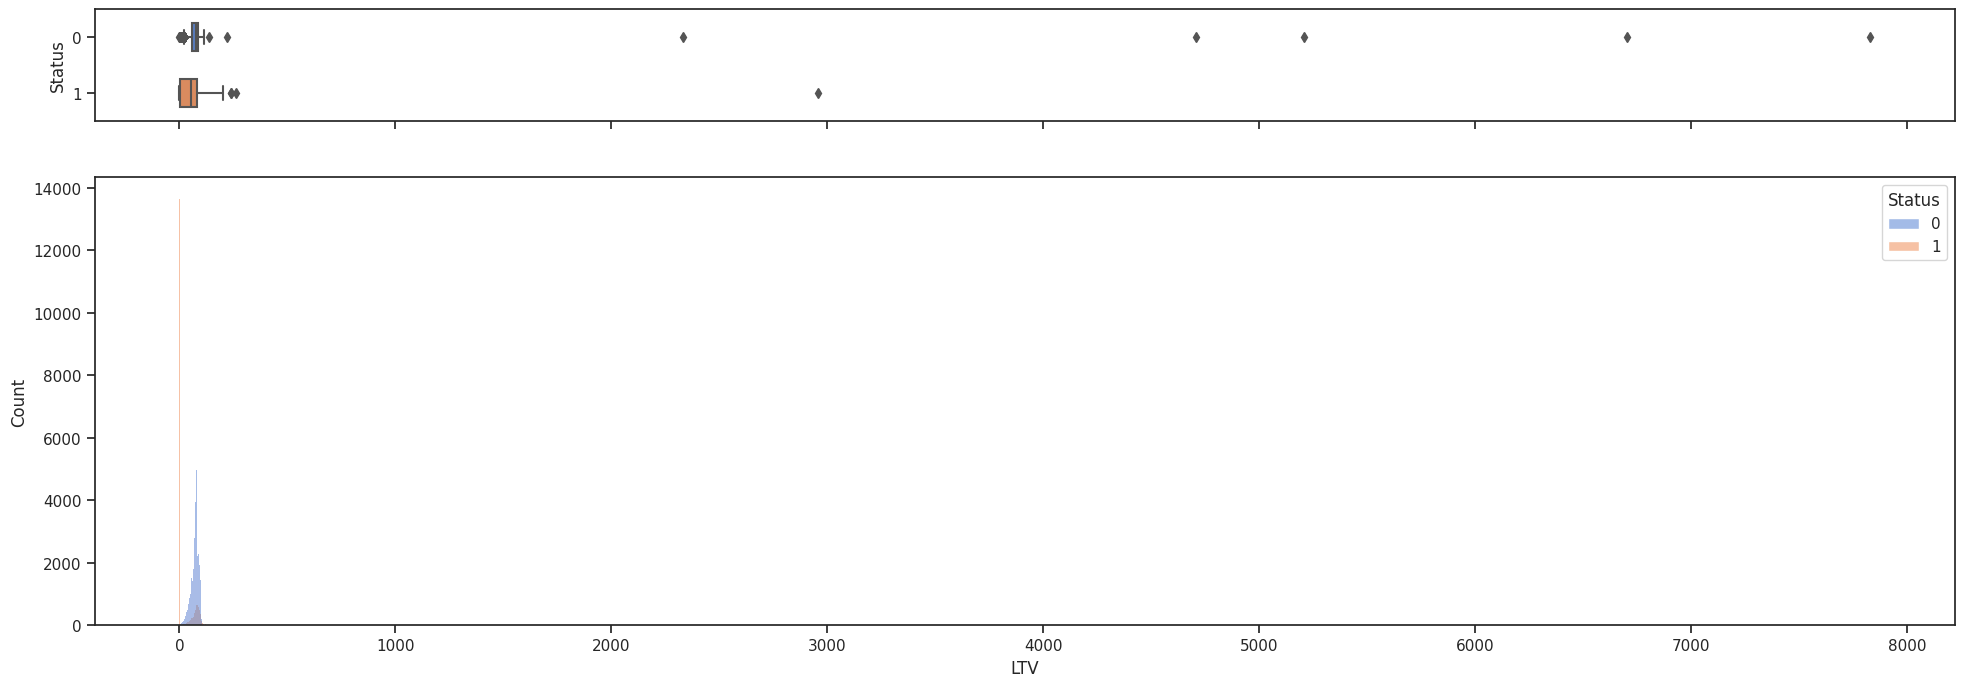

In [23]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.2, .8)},figsize=(24,8))
 
# assigning a graph to each ax
sns.boxplot(loan, x='LTV', y='Status', orient='h', ax=ax_box, width=.5)
sns.histplot(loan, x='LTV', hue='Status', ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

In [24]:
loan[loan['LTV']>1000].groupby(['Status']).count()

,loan_type,loan_purpose,Credit_Worthiness,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,interest_only,lump_sum_payment,property_value,occupancy_type,income,age,LTV,dtir1
Status,,,,,,,,,,,,,,,,,
0,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [25]:
loan[loan['LTV']<10]

,loan_type,loan_purpose,Credit_Worthiness,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,interest_only,lump_sum_payment,property_value,occupancy_type,income,age,LTV,Status,dtir1
1,type2,p1,l1,b/c,206500,4.045476,0.441656,3224.996127,360.0,not_int,lpsm,497893.465696,pr,4980.000000,55-64,0.414747,1,41.465863
26,type3,p1,l1,nob/c,476500,4.045476,0.441656,3224.996127,360.0,not_int,not_lpsm,497893.465696,pr,6780.000000,45-54,0.957032,1,70.280236
42,type3,p4,l1,nob/c,466500,4.045476,0.441656,3224.996127,360.0,not_int,not_lpsm,497893.465696,pr,6957.388743,45-54,0.936947,1,67.051018
52,type3,p3,l1,nob/c,136500,4.045476,0.441656,3224.996127,360.0,not_int,not_lpsm,497893.465696,pr,3360.000000,65-74,0.274155,1,40.625000
53,type1,p3,l1,nob/c,166500,4.045476,0.441656,3224.996127,360.0,not_int,not_lpsm,497893.465696,pr,4560.000000,65-74,0.334409,1,36.513158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148644,type1,p3,l1,nob/c,276500,4.045476,0.441656,3224.996127,180.0,not_int,not_lpsm,497893.465696,pr,4140.000000,>74,0.555340,1,66.787440
148649,type1,p3,l1,nob/c,256500,4.045476,0.441656,3224.996127,240.0,not_int,not_lpsm,497893.465696,pr,8220.000000,55-64,0.515170,1,31.204380
148652,type1,p1,l1,nob/c,96500,4.045476,0.441656,3224.996127,180.0,not_int,not_lpsm,497893.465696,ir,5460.000000,55-64,0.193817,1,17.673993
148658,type1,p4,l1,nob/c,386500,4.045476,0.441656,3224.996127,360.0,int_only,not_lpsm,497893.465696,pr,4680.000000,25-34,0.776270,1,82.585470


# Bivariate Analysis

Next, we will look at the linear relationship between the numerical features.

In [26]:
# Calculate correlations
num_var = []
for col in loan.columns:
    if loan[col].dtypes != object:
        num_var.append(col)

corr = loan[num_var].corr()

print('Top 5 pairs with strongest positive correlations:')
print('-------------------------------------------------')
print(corr.unstack().sort_values(ascending=False, kind="quicksort").drop_duplicates()[1:6])

print(' \n')
print('Top 5 pairs with strongest negative correlations:')
print('-------------------------------------------------')
print(corr.unstack().sort_values(ascending=False, kind="quicksort").drop_duplicates()[-6:-1])

Top 5 pairs with strongest positive correlations:
-------------------------------------------------
loan_amount       property_value          0.687799
rate_of_interest  Interest_rate_spread    0.614321
income            loan_amount             0.446633
                  property_value          0.389186
rate_of_interest  term                    0.183080
dtype: float64
 

Top 5 pairs with strongest negative correlations:
-------------------------------------------------
rate_of_interest      loan_amount            -0.124675
Interest_rate_spread  term                   -0.137327
property_value        LTV                    -0.186494
income                dtir1                  -0.193469
property_value        Interest_rate_spread   -0.291804
dtype: float64


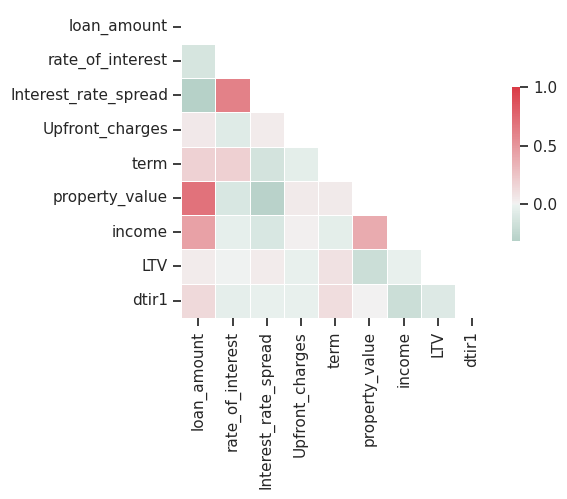

In [27]:
# Visualization of correlations using a heatmap

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(6, 4))
cmap = sns.diverging_palette(-200, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

* The correlations between *Income* & *DTIR* and between *property_value* & LTV are as expected due to how they are calculated.
* Loan_amount has relatively higher correlations with the borrower's assets, i.e. *property_value* and *income*.